# Sistema de clasificación de imagenes (Solucion)

Se procede a cargar las librerias de interes

In [66]:
# Importar paquetes
# pip install tensorflow


import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam




### Paso 1: Carga del conjunto de datos

En base a las instrucciones se descargo la data de *Kaggle*

Las carpetas del dataset contienen una carpeta llamada train que contiene 25000 archivos de imagen (formato .jpg) de perros y gatos. Las fotos están etiquetadas por su nombre de archivo, con la palabra dog o cat y otra carpeta que denominamos test1 que contiene 12500 archivos de imagenes (formato .jpg) enumerado del 1 hasta el 12500.

### Paso 2: Visualiza la información de entrada

Dado el *"peso"* de las imagenes se procedio a realizar esta actividad de manera local.

Procedamos a realizar la carga y vizualizacion de la data de prueba

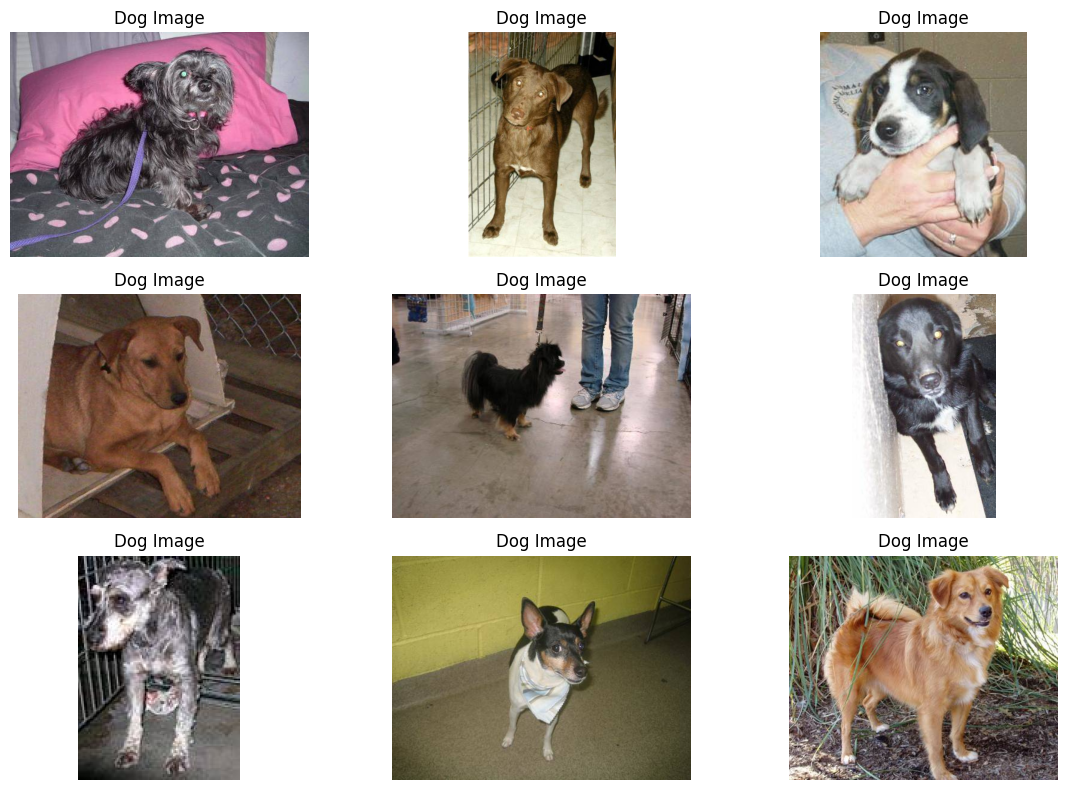

In [67]:
# Importar y comprobar las 9 primeras imágenes de perros

# Ruta al directorio que contiene sus datos de imagen
data_dir = "C:/dogs-vs-cats/Train"

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(data_dir, "dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

# Cargar las nueve primeras imágenes de perros
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Ajuste target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalice los valores de los píxeles a [0, 1].
    dog_images.append(img_array)

# Cree una única figura para mostrar las nueve imágenes
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

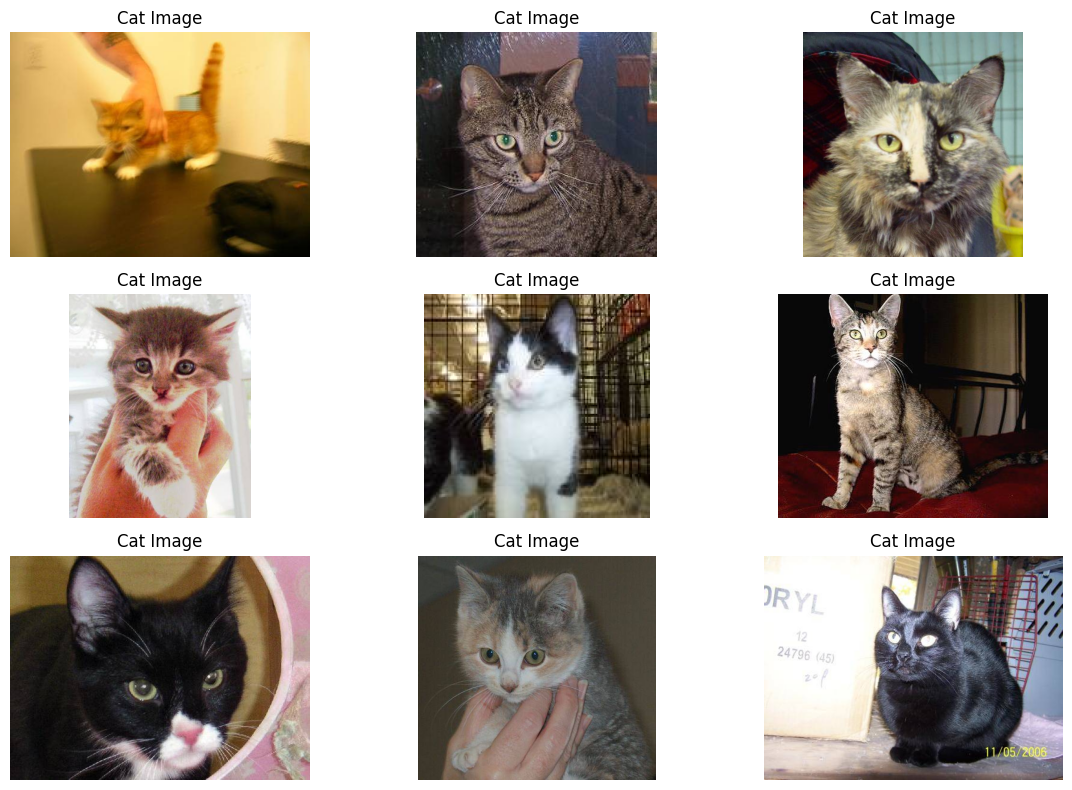

In [68]:
# Importar y comprobar las 9 primeras imágenes de gatos

# Ruta al directorio que contiene sus datos de imagen
data_dir = "C:/dogs-vs-cats/Train"

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_subfolder = os.path.join(data_dir, "cat")

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_image_files = os.listdir(cats_subfolder)

# Cargar las nueve primeras imágenes de gato
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las imágenes de gato disponibles
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes cat
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

Pasamos a cargar los conjuntos de datos de imagenes de prueba y entrenamiento para el prodecer al modelo.

In [69]:
# Definimos las rutas de datos y tamaño de imagen
train_dir = "C:/dogs-vs-cats/Train"
test_dir = "C:/dogs-vs-cats/Train"  
image_size = (200, 200)

# Creamos los generadores de datos con etiquetas de clase adecuadas
train_datagen = ImageDataGenerator(rescale=1./255)  # Aqui normalizamos los valores de pixeles
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,  # Ajustamos el tamaño del lote segun las limitaciones del hardware
    classes=["dog", "cat"],
    class_mode="categorical"  
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=32,
    classes=["test1"],
    class_mode="categorical"  
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


### Paso 3: Construye una RNA

En base al modelo base que aplica convoluciones a los datos (capas Conv2D y MaxPool2D) y después aplica capas densas (capas Dense) para el procesamiento de los valores numéricos obtenidos tras las convoluciones, se establece el modelo a utilizar

In [70]:
# Define the convolutional neural network (CNN) model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())  # Flatten the output of the convolutional layers

model.add(Dense(units=512, activation='relu'))  # Adjust number of units based on complexity
model.add(Dense(units=2, activation='softmax'))  # 2 units for 2 classes ("dog" and "cat")

# Compile the model: Ensure the number of classes in 'classes' matches the output layer units
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Fit the model with the training data
model.fit(train_data, epochs=1,batch_size = 10)  # Adjust epochs based on training needs


782/782 ━━━━━━━━━━━━━━━━━━━━ 626s 793ms/step - accuracy: 0.6142 - loss: 0.7078


El resultado revela un indicador de *accuracy* que el modelo clasifica adecuadamente la imagen un 61% de las veces, lo que hace que este modelo no sea muy bueno.


### Paso 4: Guardamos el modelo

In [71]:
model.save('model.keras')

### Paso 5: Prediccion del modelo

Procedemos a seleccionar 4 imagenes al azar, supongamos sean las numeros *4, 7, 11* y *20*

Intentemos realizar la prediccion

Para la 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step
cat


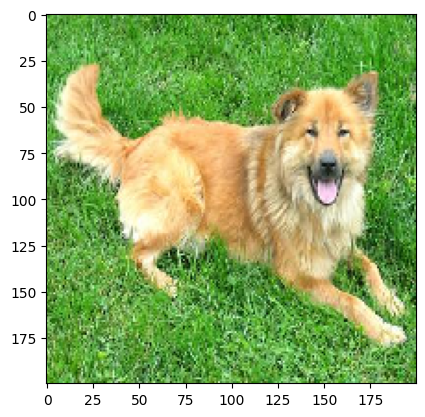

In [72]:
img = image.load_img("C:/dogs-vs-cats/test1/4.jpg", target_size=(200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

saved_model = load_model("C:/dogs-vs-cats/model.keras")
output = saved_model.predict(img)

if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

Para la 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
cat


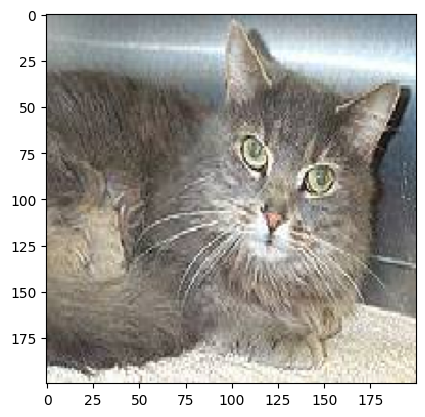

In [73]:
img = image.load_img("C:/dogs-vs-cats/test1/7.jpg", target_size=(200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

saved_model = load_model("C:/dogs-vs-cats/model.keras")
output = saved_model.predict(img)

if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

Para la 11

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
dog


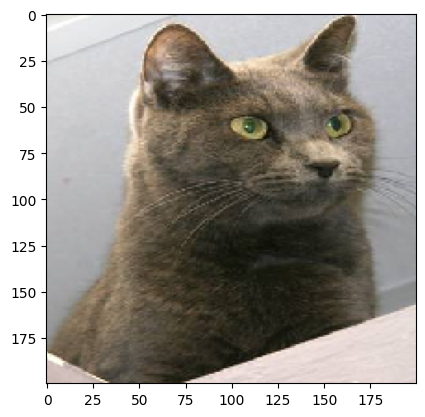

In [74]:
img = image.load_img("C:/dogs-vs-cats/test1/11.jpg", target_size=(200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

saved_model = load_model("C:/dogs-vs-cats/model.keras")
output = saved_model.predict(img)

if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

Para la 20

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
cat


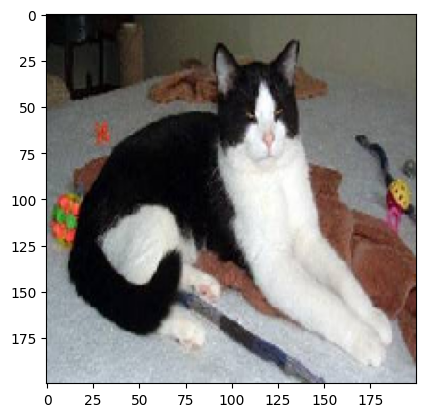

In [75]:
img = image.load_img("C:/dogs-vs-cats/test1/20.jpg", target_size=(200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

saved_model = load_model("C:/dogs-vs-cats/model.keras")
output = saved_model.predict(img)

if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

En este ejemplo que se tomo podemos observar que las imagenes *4* y *11* fueron mal clasificadas mientras que las imagenes *7* y *20* fueron bien clasificadas.